# Seoul Bike Sharing Demand Prediction - Machine Learning Analysis

**Dataset:** Seoul Bike Sharing Demand Dataset



## Part A: Data Loading

This section loads the Seoul Bike Sharing dataset into a pandas DataFrame for analysis.

In [65]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Configuring plotting settings for better visualizations
sns.set_palette('husl')
%matplotlib inline

In [66]:
# Loading the Seoul Bike Sharing dataset from CSV file
df = pd.read_csv('data/SeoulBikeData.csv', encoding='latin1')
df.columns = (
    df.columns
    .str.replace("ï¿½", "°", regex=False)
)
print("First 5 rows of the dataset:")
print(df.head())

print("\nDataset shape (rows, columns):", df.shape) # Displays basic information about the dataset
print("\nColumn names and data types:")
print(df.dtypes)

First 5 rows of the dataset:
         Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  01/12/2017                254     0             -5.2           37   
1  01/12/2017                204     1             -5.5           38   
2  01/12/2017                173     2             -6.0           39   
3  01/12/2017                107     3             -6.2           40   
4  01/12/2017                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0          

## Part B: Exploratory Data Analysis (EDA)

### B.1: Dataset Overview and Basic Statistics

In [67]:
# identifying data types, non-null counts, and memory usage
print("Dataset Information:")
print(df.info())

# Checking for missing values in columns
print("\nMissing Values Count:")
print(df.isnull().sum())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            

In [68]:
# Statistical summary of numerical features
# Mean, std, min, max and quartiles
print("Statistical Summary of Numerical Features:")
print(df.describe())

# displaing summary statistics with additional percentiles
print("\nDetailed Statistical Summary (with additional percentiles):")
print(df.describe(percentiles=[.1, .25, .5, .75, .9, .95, .99]))

Statistical Summary of Numerical Features:
       Rented Bike Count         Hour  Temperature(°C)  Humidity(%)  \
count        8760.000000  8760.000000      8760.000000  8760.000000   
mean          704.602055    11.500000        12.882922    58.226256   
std           644.997468     6.922582        11.944825    20.362413   
min             0.000000     0.000000       -17.800000     0.000000   
25%           191.000000     5.750000         3.500000    42.000000   
50%           504.500000    11.500000        13.700000    57.000000   
75%          1065.250000    17.250000        22.500000    74.000000   
max          3556.000000    23.000000        39.400000    98.000000   

       Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
count       8760.000000       8760.000000                8760.000000   
mean           1.724909       1436.825799                   4.073813   
std            1.036300        608.298712                  13.060369   
min            0.000000      

In [69]:
# Analyzing categorical features
# Understanding unique values helps in encoding feature analysing
print("Categorical Features Analysis:")
categorical_cols = df.select_dtypes(include=['object']).columns

for col in categorical_cols:
    print(f"\n{col}:")
    print(df[col].value_counts())

Categorical Features Analysis:

Date:
Date
01/12/2017    24
02/12/2017    24
03/12/2017    24
04/12/2017    24
05/12/2017    24
              ..
26/11/2018    24
27/11/2018    24
28/11/2018    24
29/11/2018    24
30/11/2018    24
Name: count, Length: 365, dtype: int64

Seasons:
Seasons
Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: count, dtype: int64

Holiday:
Holiday
No Holiday    8328
Holiday        432
Name: count, dtype: int64

Functioning Day:
Functioning Day
Yes    8465
No      295
Name: count, dtype: int64


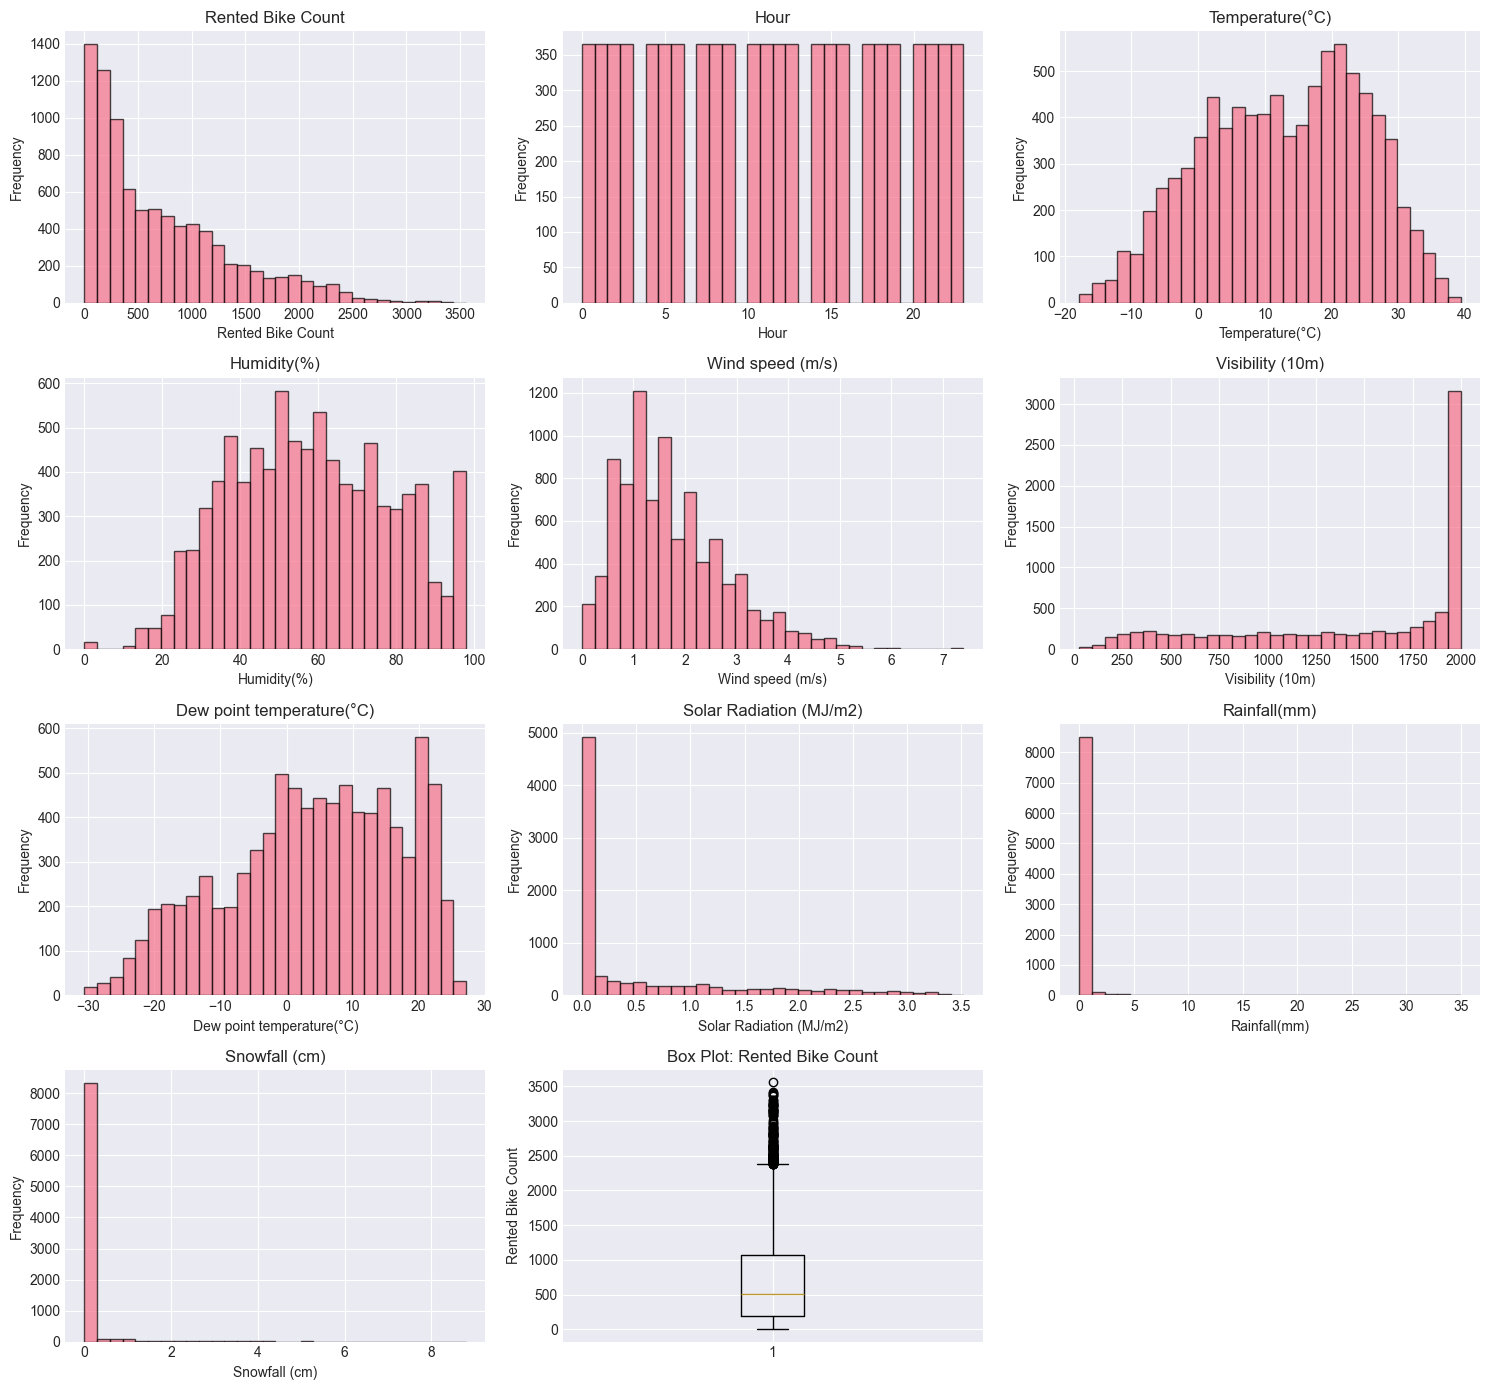

Skewness: 1.15
Kurtosis: 0.85


In [70]:
# histograms for numeric columns + box plot for target variable
numerical_cols = df.select_dtypes(include=[np.number]).columns

fig = plt.figure(figsize=(15, 14))

# Histograms for all numeric columns
rows = 4
cols = 3
for idx, col in enumerate(numerical_cols, start=1):
    ax = fig.add_subplot(rows, cols, idx)
    ax.hist(df[col], bins=30, edgecolor='black', alpha=0.7)
    ax.set_title(f'{col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')
    ax.grid(True)

# Box plot for the target variable (placed as the last subplot)
# If histograms fill all slots, add an extra row automatically
target_col = 'Rented Bike Count'
total_plots = rows * cols
box_position = len(numerical_cols) + 1

ax_box = fig.add_subplot(rows, cols, box_position)
ax_box.boxplot(df[target_col])
ax_box.set_title(f'Box Plot: {target_col}')
ax_box.set_ylabel(target_col)
ax_box.grid(True)

plt.tight_layout()
plt.show()

# Skewness & Kurtosis
print(f"Skewness: {df[target_col].skew():.2f}")
print(f"Kurtosis: {df[target_col].kurtosis():.2f}")


### Part B: Correlation Analysis

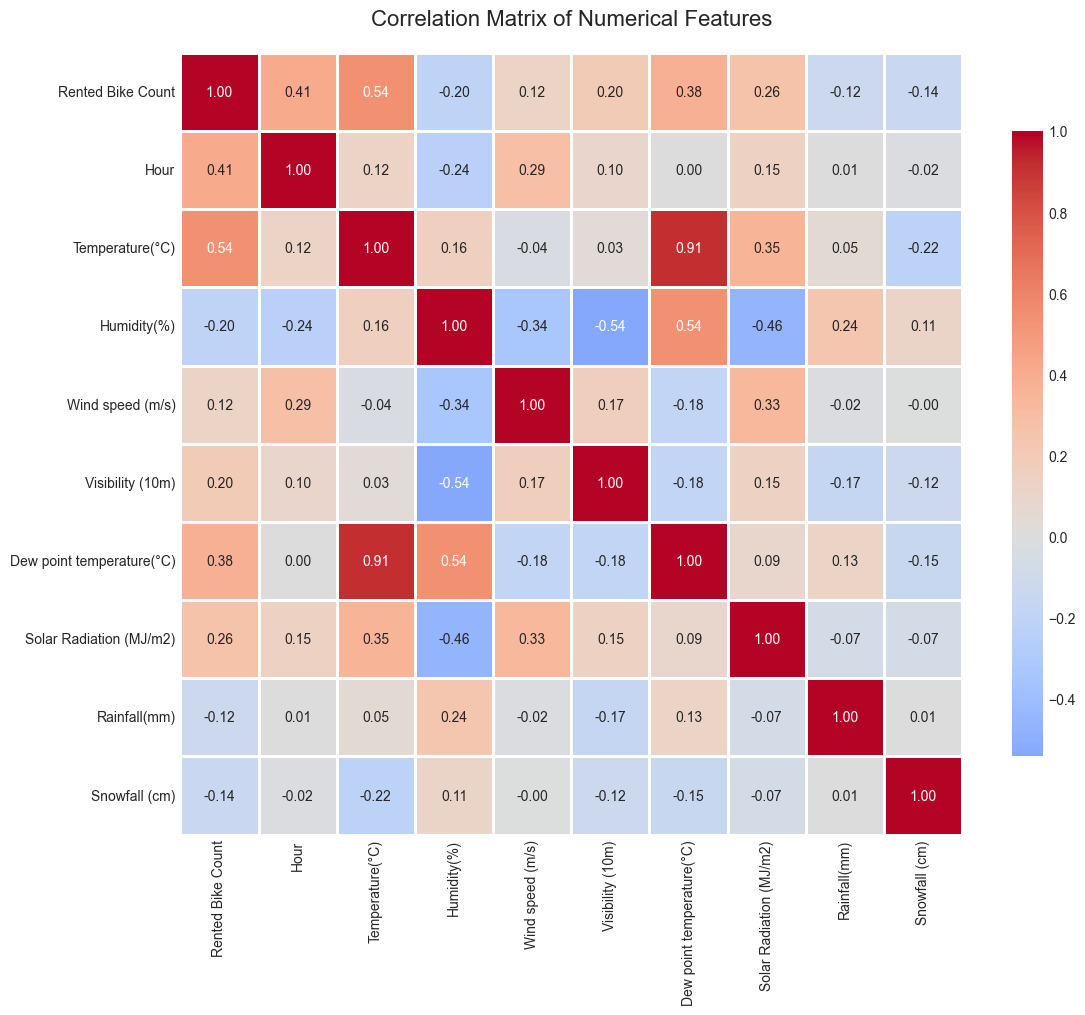


Correlation with Target Variable (Rented Bike Count):
Rented Bike Count            1.000000
Temperature(°C)              0.538558
Hour                         0.410257
Dew point temperature(°C)    0.379788
Solar Radiation (MJ/m2)      0.261837
Visibility (10m)             0.199280
Wind speed (m/s)             0.121108
Rainfall(mm)                -0.123074
Snowfall (cm)               -0.141804
Humidity(%)                 -0.199780
Name: Rented Bike Count, dtype: float64


In [71]:
# Calculating correlation matrix for all numerical features
# Correlation values range from -1 (negative) to +1 (positive)
correlation_matrix = df[numerical_cols].corr()

# Visualize correlation matrix using a heatmap
# This provides an intuitive view of feature relationships
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix of Numerical Features', fontsize=16, pad=20)
plt.tight_layout()
plt.show()

# Displaing correlations with the target variable (sorted), this helps to identify the most important predictive features
print("\nCorrelation with Target Variable (Rented Bike Count):")
target_corr = correlation_matrix['Rented Bike Count'].sort_values(ascending=False)
print(target_corr)

# Values close to 0 indicate weak linear relationships

### Analysis of  bike rental patterns by hour of day

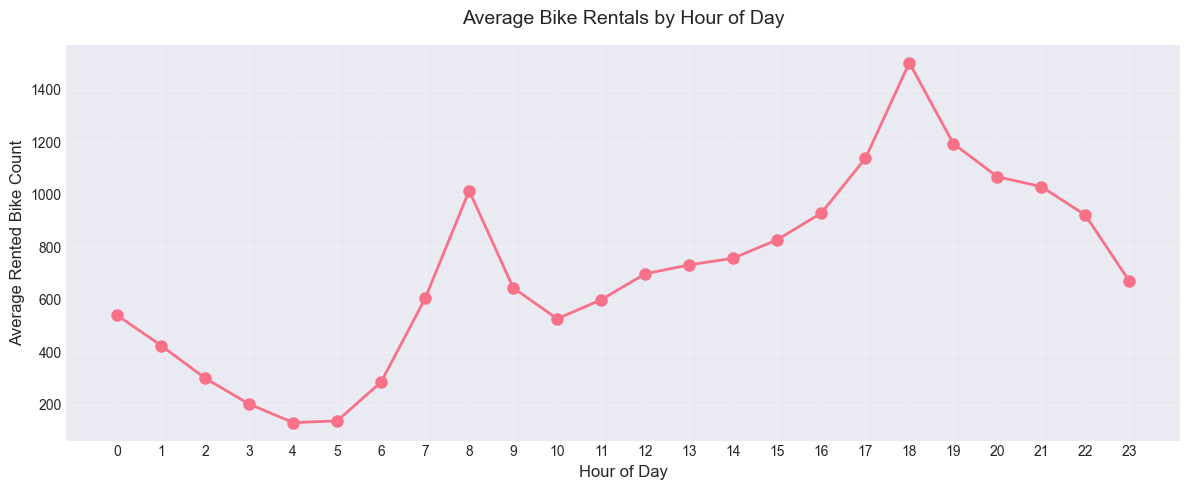

In [72]:
# This analysis reveals peak demand times
hourly_avg = df.groupby('Hour')['Rented Bike Count'].mean()

plt.figure(figsize=(12, 5))
plt.plot(hourly_avg.index, hourly_avg.values, marker='o', linewidth=2, markersize=8)
plt.xlabel('Hour of Day', fontsize=12)
plt.ylabel('Average Rented Bike Count', fontsize=12)
plt.title('Average Bike Rentals by Hour of Day', fontsize=14, pad=15)
plt.grid(True, alpha=0.3)
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()

### Analysis of bike rental patterns by season

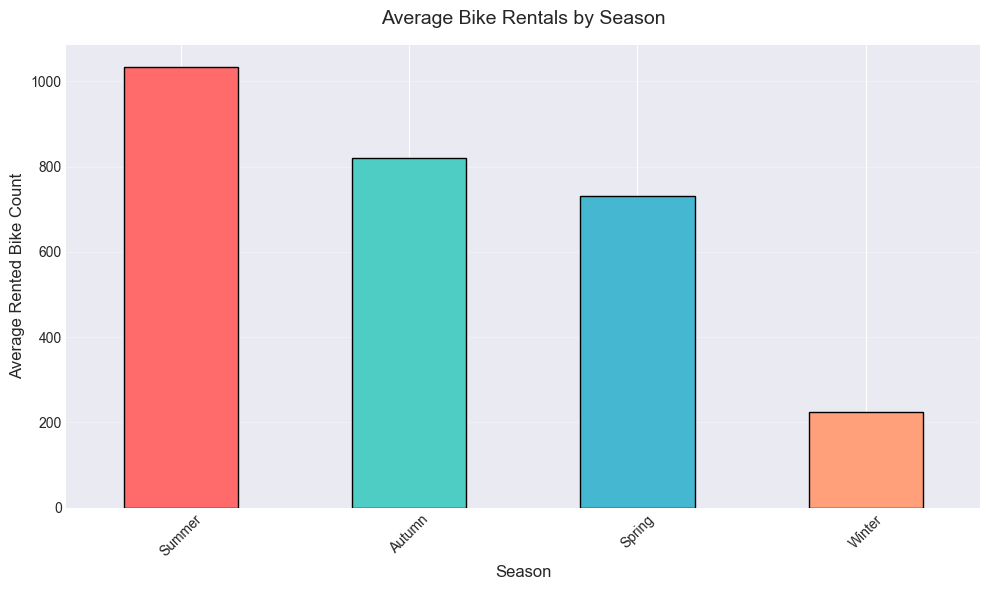


Average Rentals by Season:
Seasons
Summer    1034.07
Autumn     819.60
Spring     730.03
Winter     225.54
Name: Rented Bike Count, dtype: float64


In [73]:
season_avg = df.groupby('Seasons')['Rented Bike Count'].mean().sort_values(ascending=False)
# This analysis can show that different seasons may show different demand patterns
plt.figure(figsize=(10, 6))
season_avg.plot(kind='bar', color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A'], edgecolor='black')
plt.xlabel('Season', fontsize=12)
plt.ylabel('Average Rented Bike Count', fontsize=12)
plt.title('Average Bike Rentals by Season', fontsize=14, pad=15)
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

print("\nAverage Rentals by Season:")
print(season_avg.round(2))

### Weather impact analysis on bike rental demand

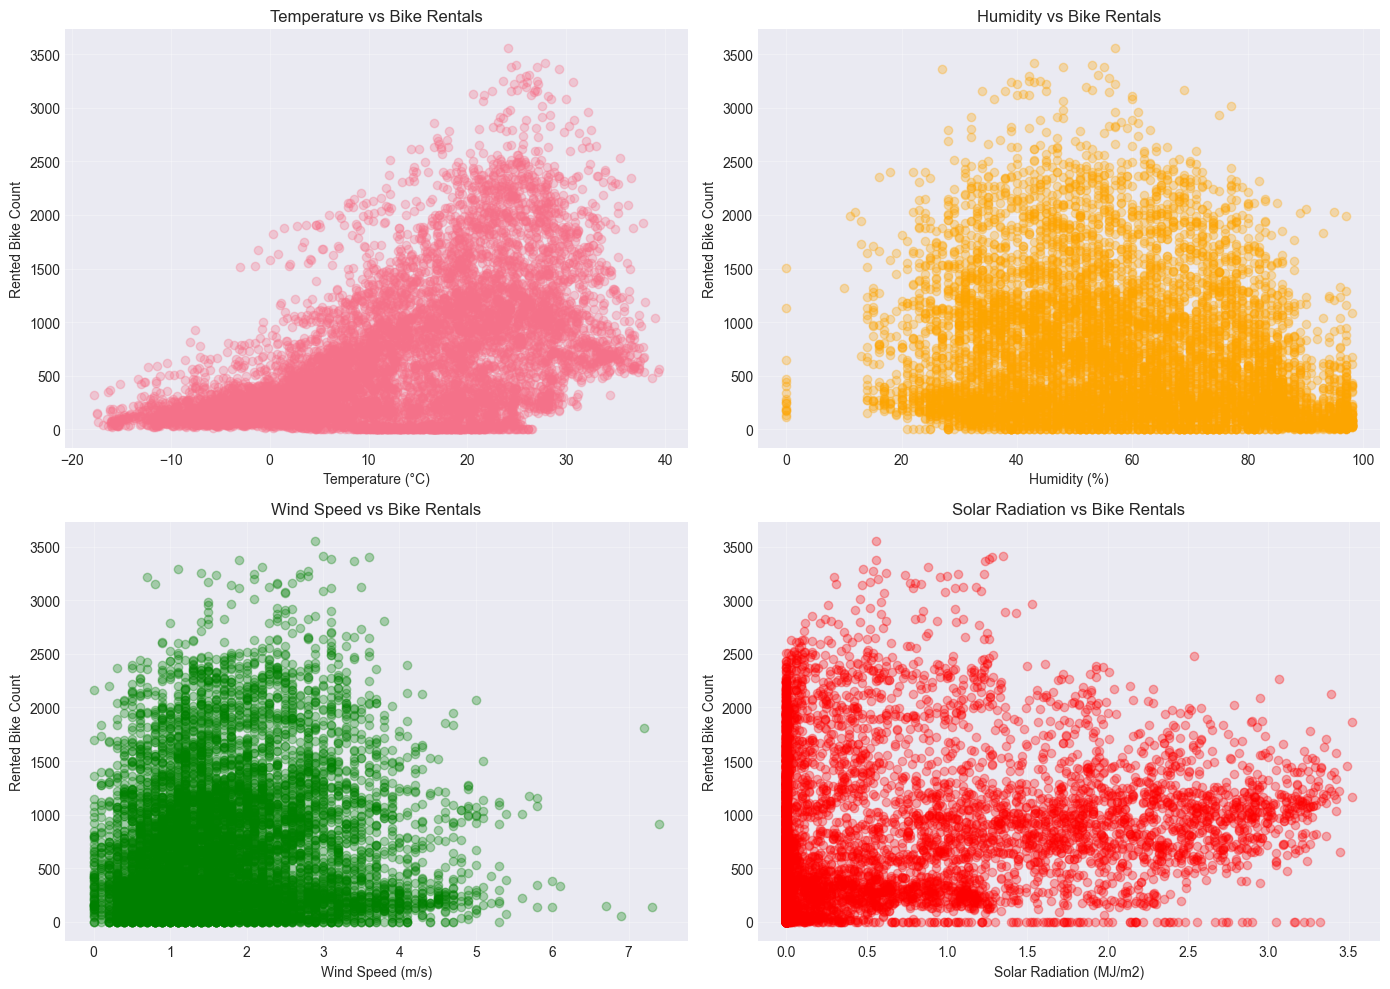

In [74]:
# Scatter plots are used to show relationship between weather and bike rentals
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Temperature vs Bike Count
axes[0, 0].scatter(df['Temperature(°C)'], df['Rented Bike Count'], alpha=0.3)
axes[0, 0].set_xlabel('Temperature (°C)')
axes[0, 0].set_ylabel('Rented Bike Count')
axes[0, 0].set_title('Temperature vs Bike Rentals')
axes[0, 0].grid(True, alpha=0.3)

# Humidity vs Bike Count
axes[0, 1].scatter(df['Humidity(%)'], df['Rented Bike Count'], alpha=0.3, color='orange')
axes[0, 1].set_xlabel('Humidity (%)')
axes[0, 1].set_ylabel('Rented Bike Count')
axes[0, 1].set_title('Humidity vs Bike Rentals')
axes[0, 1].grid(True, alpha=0.3)

# Wind Speed vs Bike Count
axes[1, 0].scatter(df['Wind speed (m/s)'], df['Rented Bike Count'], alpha=0.3, color='green')
axes[1, 0].set_xlabel('Wind Speed (m/s)')
axes[1, 0].set_ylabel('Rented Bike Count')
axes[1, 0].set_title('Wind Speed vs Bike Rentals')
axes[1, 0].grid(True, alpha=0.3)

# Solar Radiation vs Bike Count
axes[1, 1].scatter(df['Solar Radiation (MJ/m2)'], df['Rented Bike Count'], alpha=0.3, color='red')
axes[1, 1].set_xlabel('Solar Radiation (MJ/m2)')
axes[1, 1].set_ylabel('Rented Bike Count')
axes[1, 1].set_title('Solar Radiation vs Bike Rentals')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Part C: Data Preparation


In [75]:
# Creating a copy of the dataframe for preprocessing
df_processed = df.copy()

# checking for duplicate rows
duplicates = df_processed.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

if duplicates > 0:
    df_processed = df_processed.drop_duplicates()
    print(f"Duplicates removed. New shape: {df_processed.shape}")

Number of duplicate rows: 0


In [79]:
# checking for missing values
print("Missing values before cleaning:")
print(df_processed.isnull().sum())
# no missing valued found in dataset

Missing values before cleaning:
Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64


In [80]:
# Checking for outliers using IQR method
# IQR = Q3 - Q1; Outliers are values below Q1-1.5*IQR or above Q3+1.5*IQR
def detect_outliers_iqr(data, column):
    """Detecting outliers using the Interquartile Range method"""
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

# Checking outliers for key numerical features
print("Outlier Analysis:")
outlier_cols = ['Rented Bike Count', 'Temperature(°C)', 'Humidity(%)', 
                'Wind speed (m/s)', 'Solar Radiation (MJ/m2)']

for col in outlier_cols:
    outliers, lower, upper = detect_outliers_iqr(df_processed, col)
    print(f"\n{col}:")
    print(f"  Lower bound: {lower:.2f}")
    print(f"  Upper bound: {upper:.2f}")
    print(f"  Number of outliers: {len(outliers)} ({len(outliers)/len(df_processed)*100:.2f}%)")

Outlier Analysis:

Rented Bike Count:
  Lower bound: -1120.38
  Upper bound: 2376.62
  Number of outliers: 158 (1.80%)

Temperature(°C):
  Lower bound: -25.00
  Upper bound: 51.00
  Number of outliers: 0 (0.00%)

Humidity(%):
  Lower bound: -6.00
  Upper bound: 122.00
  Number of outliers: 0 (0.00%)

Wind speed (m/s):
  Lower bound: -1.20
  Upper bound: 4.40
  Number of outliers: 161 (1.84%)

Solar Radiation (MJ/m2):
  Lower bound: -1.40
  Upper bound: 2.33
  Number of outliers: 641 (7.32%)


In [81]:
# Handling outliers by capping
# This preserves data points while limiting extreme values
# We cap at 1st and 99th percentiles to retain data distribution
def cap_outliers(data, column, lower_percentile=0.01, upper_percentile=0.99):
    """Cap outliers at specified percentiles"""
    lower_cap = data[column].quantile(lower_percentile)
    upper_cap = data[column].quantile(upper_percentile)
    data[column] = data[column].clip(lower=lower_cap, upper=upper_cap)
    return data

# Apply capping to extreme outliers (only if percentage is very high)
# For this dataset, we'll keep outliers as they represent real variations
print("Outliers retained as they represent genuine demand variations.")
print("Shape after outlier handling:", df_processed.shape)

Outliers retained as they represent genuine demand variations.
Shape after outlier handling: (8760, 14)


In [83]:
# Convert Date column to datetime format for temporal feature extraction
df_processed['Date'] = pd.to_datetime(df_processed['Date'], format='%d/%m/%Y')

# Extracting temporal features
# These features capture cyclical patterns in bike demand
df_processed['Year'] = df_processed['Date'].dt.year
df_processed['Month'] = df_processed['Date'].dt.month
df_processed['Day'] = df_processed['Date'].dt.day
df_processed['DayOfWeek'] = df_processed['Date'].dt.dayofweek  # Monday=0, Sunday=6

# Creating binary features for weekend and working hours
# These capture different usage patterns
df_processed['IsWeekend'] = (df_processed['DayOfWeek'] >= 5).astype(int)
df_processed['IsWorkingHour'] = df_processed['Hour'].apply(
    lambda x: 1 if (7 <= x <= 9) or (17 <= x <= 19) else 0
)

# Creating interaction features
# Temperature and hour interaction captures comfort zones at different times
df_processed['Temp_Hour_Interaction'] = df_processed['Temperature(°C)'] * df_processed['Hour']

# Creating weather comfort index
# Comfortable weather conditions may increase bike usage
df_processed['Weather_Comfort'] = (
    (df_processed['Temperature(°C)'] > 10) & 
    (df_processed['Temperature(°C)'] < 30) &
    (df_processed['Rainfall(mm)'] == 0) &
    (df_processed['Snowfall (cm)'] == 0)
).astype(int)

print("Feature engineering completed.")
print(f"New shape: {df_processed.shape}")
print(f"\nNew features created:")
new_features = ['Year', 'Month', 'Day', 'DayOfWeek', 'IsWeekend', 
                'IsWorkingHour', 'Temp_Hour_Interaction', 'Weather_Comfort']
print(new_features)

Feature engineering completed.
New shape: (8760, 22)

New features created:
['Year', 'Month', 'Day', 'DayOfWeek', 'IsWeekend', 'IsWorkingHour', 'Temp_Hour_Interaction', 'Weather_Comfort']


In [84]:
# Encoding Categorical Variables
# Import encoding libraries
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Binary encoding for Holiday (Yes/No)
# Simple binary features can use label encoding
df_processed['Holiday'] = df_processed['Holiday'].map({'No Holiday': 0, 'Holiday': 1})

# Binary encoding for Functioning Day (Yes/No)
df_processed['Functioning Day'] = df_processed['Functioning Day'].map({'Yes': 1, 'No': 0})

# One-hot encoding for Seasons (nominal categorical variable)
# Seasons have no ordinal relationship, so one-hot encoding is appropriate
seasons_dummies = pd.get_dummies(df_processed['Seasons'], prefix='Season')
df_processed = pd.concat([df_processed, seasons_dummies], axis=1)

# Dropping original categorical columns
df_processed = df_processed.drop(['Seasons', 'Date'], axis=1)

print("Categorical encoding completed.")
print(f"Final shape: {df_processed.shape}")
print(f"\nColumns after encoding:")
print(df_processed.columns.tolist())

Categorical encoding completed.
Final shape: (8760, 24)

Columns after encoding:
['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Holiday', 'Functioning Day', 'Year', 'Month', 'Day', 'DayOfWeek', 'IsWeekend', 'IsWorkingHour', 'Temp_Hour_Interaction', 'Weather_Comfort', 'Season_Autumn', 'Season_Spring', 'Season_Summer', 'Season_Winter']


In [86]:
# Feature Scaling and Normalization
# Scaling ensures all features contribute equally to the model, especially important for distance-based algorithms.
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Separate features (X) and target variable (y)
X = df_processed.drop('Rented Bike Count', axis=1)
y = df_processed['Rented Bike Count']

print("Features shape:", X.shape)
print("Target shape:", y.shape)
print(f"\nTarget variable statistics:")
print(f"Mean: {y.mean():.2f}")
print(f"Std: {y.std():.2f}")
print(f"Min: {y.min():.2f}")
print(f"Max: {y.max():.2f}")

Features shape: (8760, 23)
Target shape: (8760,)

Target variable statistics:
Mean: 704.60
Std: 645.00
Min: 0.00
Max: 3556.00


### Train-Test-Validation Split

Splitting data prevents overfitting and allows proper model evaluation. We use:
- Training set (70%): For model training
- Validation set (15%): For hyperparameter tuning
- Test set (15%): For final evaluation

In [88]:
from sklearn.model_selection import train_test_split

# First split: separate test set (15%)
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.15, random_state=42, shuffle=True
)

# Second split: separate validation set (15% of remaining = ~17.6% of temp)
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.176, random_state=42, shuffle=True
)

print("Data split completed:")
print(f"Training set: {X_train.shape[0]} samples ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"Validation set: {X_val.shape[0]} samples ({X_val.shape[0]/len(X)*100:.1f}%)")
print(f"Test set: {X_test.shape[0]} samples ({X_test.shape[0]/len(X)*100:.1f}%)")
print(f"\nTotal samples: {X_train.shape[0] + X_val.shape[0] + X_test.shape[0]}")

Data split completed:
Training set: 6135 samples (70.0%)
Validation set: 1311 samples (15.0%)
Test set: 1314 samples (15.0%)

Total samples: 8760


In [89]:
# Applying StandardScaler to normalize features
# StandardScaler transforms features to have mean=0 and std=1
# This is important for gradient-based algorithms
scaler = StandardScaler()

# Fit scaler on training data only to prevent data leakage
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Converting back to DataFrames for easier handling
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_val_scaled = pd.DataFrame(X_val_scaled, columns=X_val.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

print("Feature scaling completed using StandardScaler.")
print(f"\nScaled training data sample:")
print(X_train_scaled.head())

Feature scaling completed using StandardScaler.

Scaled training data sample:
       Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  Visibility (10m)  \
0 -0.490527        -0.387861     0.911165         -1.181800          0.918472   
1  0.810921         0.909508     0.323908          0.173278         -0.018118   
2  0.521711         0.614651    -0.361224          2.205894         -0.805183   
3  0.377105         0.597802     1.498421         -0.697844          0.686789   
4  1.389343         0.858961    -0.361224         -0.020305          0.358161   

   Dew point temperature(°C)  Solar Radiation (MJ/m2)  Rainfall(mm)  \
0                   0.022209                -0.419141     -0.136181   
1                   0.970854                 0.506015     -0.136181   
2                   0.430975                 2.619026     -0.136181   
3                   1.078830                -0.350611      0.344916   
4                   0.631501                -0.658997     -0.136181   

   Snowf

## Part D: Model Training

We will train three different regression algorithms:
1. **Random Forest Regressor**: Ensemble method, robust to outliers
2. **Gradient Boosting Regressor**: Sequential ensemble, high accuracy
3. **Support Vector Regressor (SVR)**: Effective in high-dimensional spaces

In [90]:
# Importing machine learning models
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Ridge
import time

### Random Forest Regression

In [93]:
# Train Random Forest Regressor
print("Training Random Forest Regressor")
start_time = time.time()

# Hyperparameters:
# n_estimators: Number of trees (more trees = better performance but slower)
# max_depth: Maximum depth of trees (prevents overfitting)
# min_samples_split: Minimum samples required to split (prevents overfitting)
# random_state: For reproducibility
rf_model = RandomForestRegressor(
    n_estimators=100,
    max_depth=20,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42,
    n_jobs=-1  # Use all CPU cores
)

rf_model.fit(X_train_scaled, y_train)
rf_train_time = time.time() - start_time

# Display feature importance
feature_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

print("\nTop 10 Most Important Features:")
print(feature_importance.head(10))

Training Random Forest Regressor

Top 10 Most Important Features:
                    feature  importance
17    Temp_Hour_Interaction    0.420308
0                      Hour    0.138628
2               Humidity(%)    0.086696
10          Functioning Day    0.080746
1           Temperature(°C)    0.064390
16            IsWorkingHour    0.028330
6   Solar Radiation (MJ/m2)    0.026701
14                DayOfWeek    0.021776
22            Season_Winter    0.019315
12                    Month    0.018778

Top 10 Most Important Features:
                    feature  importance
17    Temp_Hour_Interaction    0.420308
0                      Hour    0.138628
2               Humidity(%)    0.086696
10          Functioning Day    0.080746
1           Temperature(°C)    0.064390
16            IsWorkingHour    0.028330
6   Solar Radiation (MJ/m2)    0.026701
14                DayOfWeek    0.021776
22            Season_Winter    0.019315
12                    Month    0.018778


### Gradient Boosting Regressor

Gradient Boosting builds trees sequentially, where each tree corrects errors of previous trees. It:
- Often achieves high accuracy

In [94]:
# Train Gradient Boosting Regressor
print("Training Gradient Boosting Regressor")
start_time = time.time()

# Hyperparameters:
# n_estimators: Number of boosting stages
# learning_rate: Step size for weight updates (lower = more conservative)
# max_depth: Maximum depth of individual trees
# subsample: Fraction of samples used for fitting trees (prevents overfitting)
gb_model = GradientBoostingRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    min_samples_split=5,
    min_samples_leaf=2,
    subsample=0.8,
    random_state=42
)

gb_model.fit(X_train_scaled, y_train)
gb_train_time = time.time() - start_time

Training Gradient Boosting Regressor


### Support Vector Regressor (SVR)

SVR finds a function that deviates from targets by at most epsilon. It:
- Works well in high-dimensional spaces
- Is sensitive to feature scaling (already applied)

In [96]:
# Train Support Vector Regressor
print("Training Support Vector Regressor")
start_time = time.time()

# Hyperparameters:
# kernel: Type of kernel function ('rbf' = Radial Basis Function)
# C: Regularization parameter (higher = less regularization)
# epsilon: Margin of tolerance
# gamma: Kernel coefficient (higher = more complex decision boundary)
svr_model = SVR(
    kernel='rbf',
    C=100,
    epsilon=10,
    gamma='scale'
)

svr_model.fit(X_train_scaled, y_train)
svr_train_time = time.time() - start_time

Training Support Vector Regressor
